# Regularization

In [ ]:
Linear Models:
    1. Linear Regression (Regression)
    2. Logistic Regression (Classification)
    
How to avoid overfitting in Linear Models:
    1. Ridge Regression 
    2. Lasso Regression

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston=load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE']=boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Feature selection

In [4]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### 1. Linearity

<AxesSubplot:>

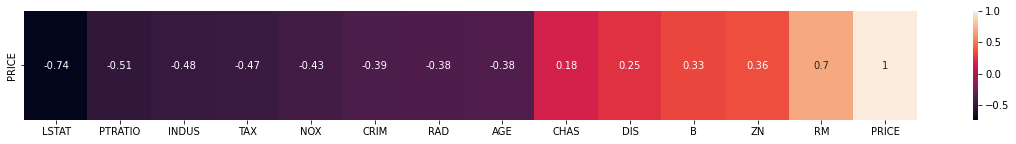

In [8]:
corr=df.corr().tail(1).sort_values('PRICE',axis=1)
plt.figure(figsize=(20,2))
sns.heatmap(corr,annot=True)

### 2. No Multicollinearity

CRIM        2.100373
ZN          2.844013
INDUS      14.485758
CHAS        1.152952
NOX        73.894947
RM         77.948283
AGE        21.386850
DIS        14.699652
RAD        15.167725
TAX        61.227274
PTRATIO    85.029547
B          20.104943
LSTAT      11.102025
dtype: float64

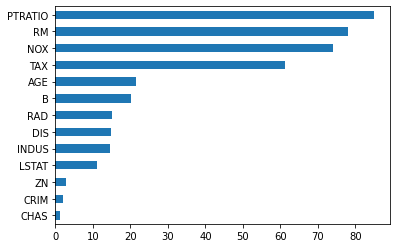

In [12]:
x=df.drop('PRICE',axis=1)
vif_list=[]
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
    
s1=pd.Series(vif_list,index=x.columns)
s1.sort_values().plot(kind='barh')

### Train Model

In [14]:
x=df.drop('PRICE',axis=1)
y=df['PRICE']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11,shuffle=True)

### 1. Linear Regression

In [16]:
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression()

In [17]:
#Training data Evaluation
y_pred_train=linear_reg_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('MAE is: ',mae)

r2=r2_score(y_train,y_pred_train)
print("R- Squared value : ",r2)

MSE is:  20.89839548405952
RMSE is:  4.571476291534226
MAE is:  3.2542201482150492
R- Squared value :  0.7511508467017516


In [18]:
#Testing data Evaluation
y_pred=linear_reg_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('MAE is: ',mae)

r2=r2_score(y_test,y_pred)
print("R- Squared value : ",r2)

MSE is:  26.944812249518208
RMSE is:  5.190839262539171
MAE is:  3.5673260189967984
R- Squared value :  0.6859495577055554


<AxesSubplot:>

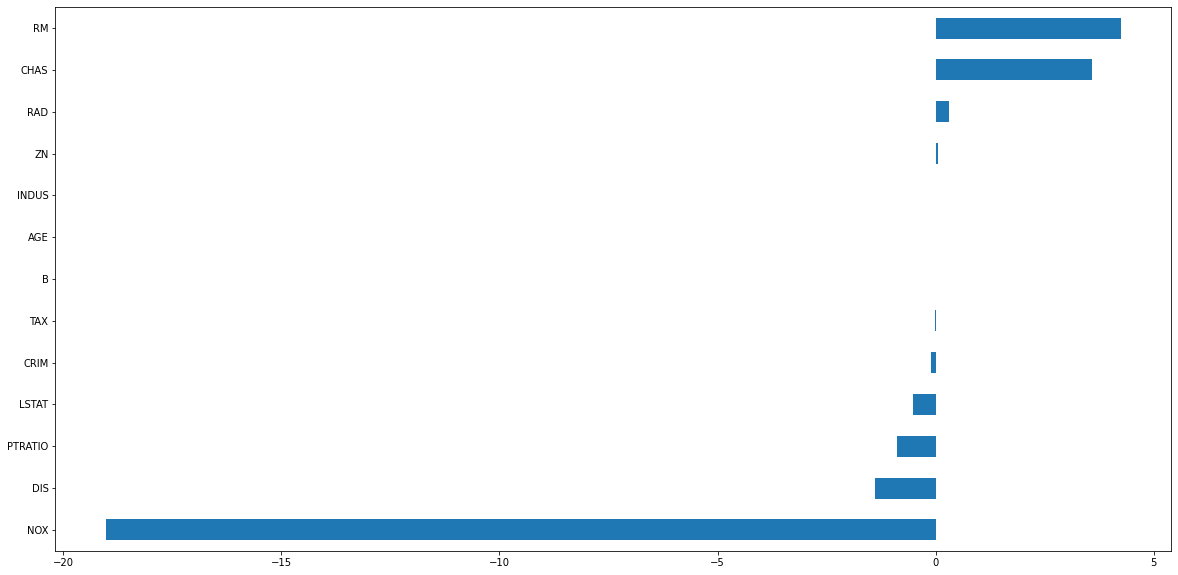

In [36]:
linear_reg_model=LinearRegression()
linear_reg_model.fit(x_train,y_train)

s2=pd.Series(linear_reg_model.coef_,index=x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind='barh')

## 2. Ridge

In [23]:
ridge_reg_model=Ridge(alpha=1.0)  #alpha==lambda
ridge_reg_model.fit(x_train,y_train)

Ridge()

In [24]:
#Training data Evaluation
y_pred_train=ridge_reg_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('MAE is: ',mae)

r2=r2_score(y_train,y_pred_train)
print("R- Squared value : ",r2)

MSE is:  21.121144480921362
RMSE is:  4.5957746333911285
MAE is:  3.248266003403979
R- Squared value :  0.7484984469369284


In [25]:
#Testing data Evaluation
y_pred=ridge_reg_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('MAE is: ',mae)

r2=r2_score(y_test,y_pred)
print("R- Squared value : ",r2)

MSE is:  26.70380918769106
RMSE is:  5.167572852673783
MAE is:  3.512189077585274
R- Squared value :  0.6887585258089604


<AxesSubplot:>

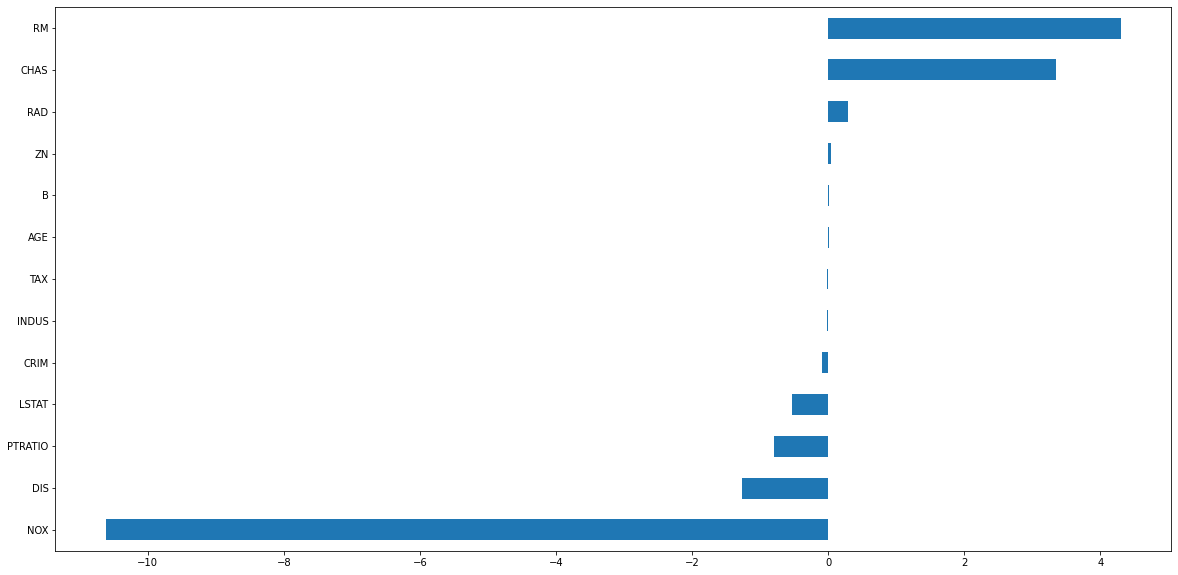

In [35]:
ridge_reg_model=Ridge(alpha=1.0)  #alpha==lambda
ridge_reg_model.fit(x_train,y_train)

s2=pd.Series(ridge_reg_model.coef_,index=x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind='barh')

### 3. Lasso Reg

In [29]:
lasso_reg_model=Lasso(alpha=1.0)
lasso_reg_model.fit(x_train,y_train)

Lasso()

In [30]:
#Training data Evaluation
y_pred_train=lasso_reg_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('MAE is: ',mae)

r2=r2_score(y_train,y_pred_train)
print("R- Squared value : ",r2)

MSE is:  26.539670359591348
RMSE is:  5.151666755487136
MAE is:  3.6301862283653645
R- Squared value :  0.6839769587652562


In [31]:
#Testing data Evaluation
y_pred=lasso_reg_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('MAE is: ',mae)

r2=r2_score(y_test,y_pred)
print("R- Squared value : ",r2)

MSE is:  28.599769738543415
RMSE is:  5.347875254579469
MAE is:  3.842005239446497
R- Squared value :  0.6666604965462533


<AxesSubplot:>

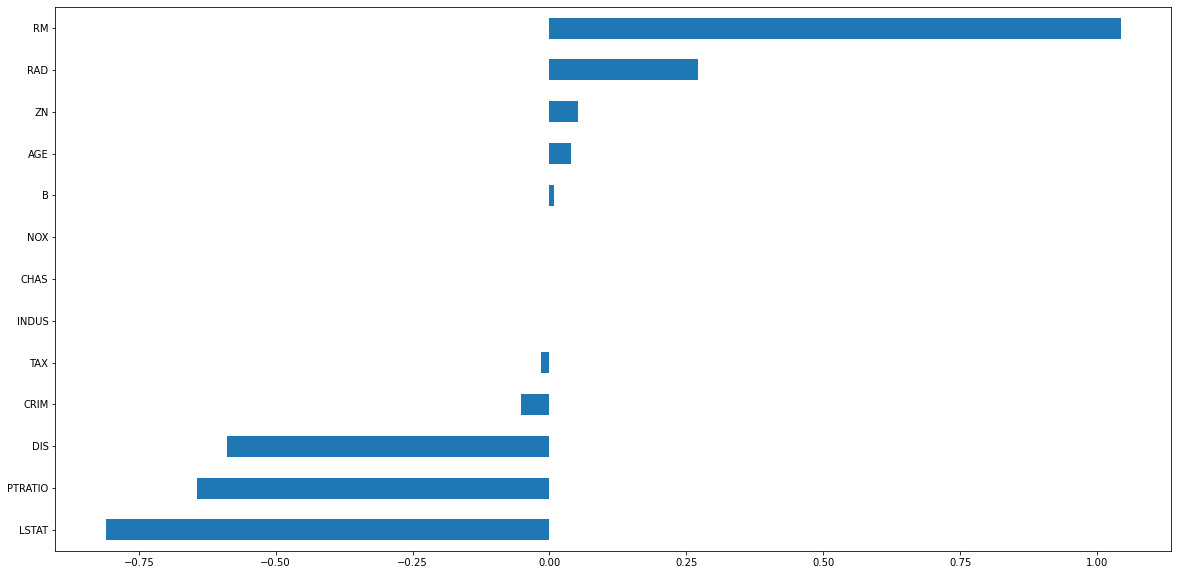

In [34]:
lasso_reg_model=Lasso(alpha=1.0)
lasso_reg_model.fit(x_train,y_train)

s2=pd.Series(lasso_reg_model.coef_,index=x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind='barh')

## Hyperparameter Tuning

In [ ]:
1. GridSearchCV
2. RandomisedSearchCV

CV >> cross validation(k-fold cross validation)

#### Ridge Regression with Hyperparameter Tuning

In [45]:
ridge_model=Ridge()

param_grid={'alpha':np.arange(0.01,3,0.01)}

gscv_ridge_model=GridSearchCV(ridge_model,param_grid,cv=5)
gscv_ridge_model.fit(x_train,y_train)
gscv_ridge_model.best_estimator_

Ridge(alpha=0.47000000000000003)

In [46]:
lasso_model=Lasso()

param_grid={'alpha':np.arange(0.01,3,0.01)}

gscv_lasso_model=GridSearchCV(lasso_model,param_grid,cv=5)
gscv_lasso_model.fit(x_train,y_train)
gscv_lasso_model.best_estimator_

Lasso(alpha=0.01)

### Ridge Regression after tuning alpha value

In [47]:
ridge_reg_model=Ridge(alpha=0.47)  #alpha==lambda
ridge_reg_model.fit(x_train,y_train)
#Training data Evaluation
y_pred_train=ridge_reg_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('MAE is: ',mae)

r2=r2_score(y_train,y_pred_train)
print("R- Squared value : ",r2)

MSE is:  20.982067267539858
RMSE is:  4.580618655546417
MAE is:  3.2438007829903763
R- Squared value :  0.7501545188980254


In [48]:
#Testing data Evaluation
y_pred=ridge_reg_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('MAE is: ',mae)

r2=r2_score(y_test,y_pred)
print("R- Squared value : ",r2)

MSE is:  26.765834672994146
RMSE is:  5.173570785540114
MAE is:  3.5238725285874533
R- Squared value :  0.6880355988532043


<AxesSubplot:>

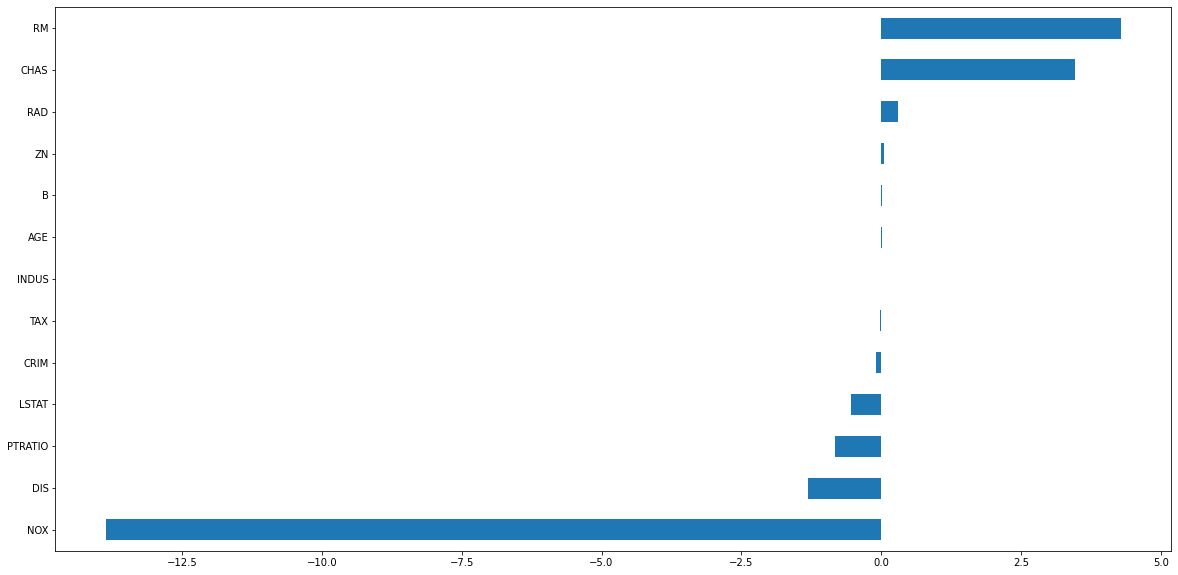

In [52]:
ridge_reg_model=Ridge(alpha=0.47)  #alpha==lambda
ridge_reg_model.fit(x_train,y_train)

s2=pd.Series(ridge_reg_model.coef_,index=x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind='barh')

### Lasso Regression after tuning alpha value

In [49]:
lasso_reg_model=Lasso(alpha=0.01)
lasso_reg_model.fit(x_train,y_train)

#Training data Evaluation
y_pred_train=lasso_reg_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_train,y_pred_train)
print('MAE is: ',mae)

r2=r2_score(y_train,y_pred_train)
print("R- Squared value : ",r2)

MSE is:  20.934345313313614
RMSE is:  4.575406573553176
MAE is:  3.244294261152768
R- Squared value :  0.7507227715139737


In [50]:
#Testing data Evaluation
y_pred=lasso_reg_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
print('MSE is: ',mse)

rmse=np.sqrt(mse)
print('RMSE is: ',rmse)

mae=mean_absolute_error(y_test,y_pred)
print('MAE is: ',mae)

r2=r2_score(y_test,y_pred)
print("R- Squared value : ",r2)

MSE is:  26.73132373084525
RMSE is:  5.170234398056364
MAE is:  3.5342073827230798
R- Squared value :  0.6884378349699564


<AxesSubplot:>

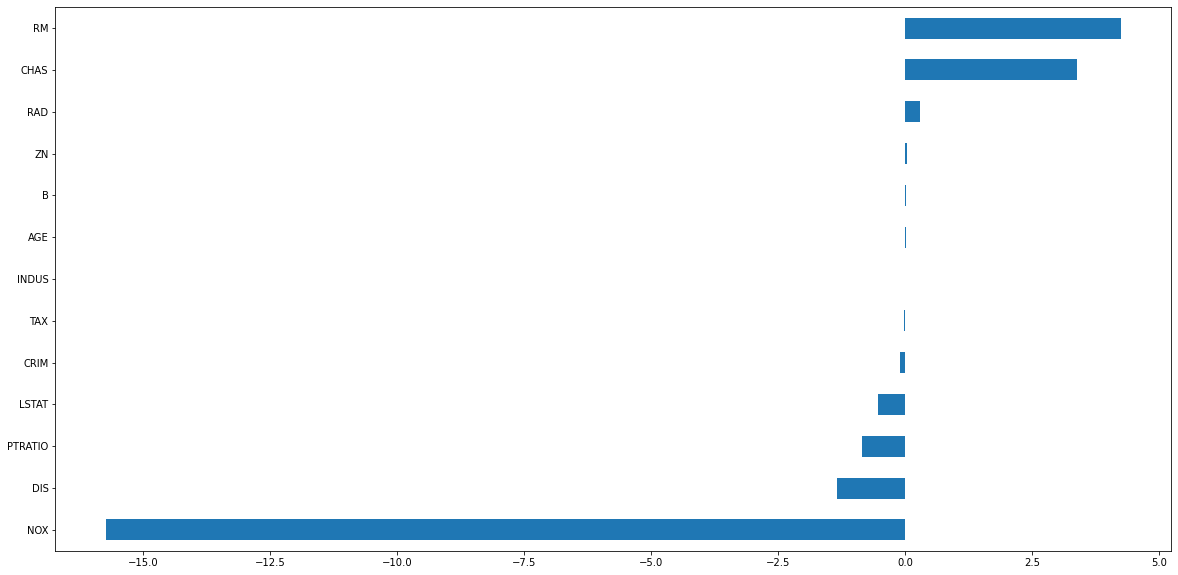

In [51]:
lasso_reg_model=Lasso(alpha=0.01)
lasso_reg_model.fit(x_train,y_train)

s2=pd.Series(lasso_reg_model.coef_,index=x.columns)
plt.figure(figsize=(20,10))
s2.sort_values().plot(kind='barh')

In [37]:
# from sklearn.ensemble import RandomForestClassifier

In [39]:
# rf_model=RandomForestClassifier()

# param_grid={'n_estimators':100,
#             'max_depth':np.arange(5,10), #5
#             'min_samples_split':[4,5,6,7],   #4
#             'min_samples_leaf':[1,2,3,4,5,6]} #6
5*4*6

120

In [ ]:
# GridSearchCV(rf_model,param_grid)